[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/exercises/3_ex_predictive_analytics.ipynb) 

# BADS Exercise 3 on the foundations of predictive analytics
The following exercise tasks revisit some concepts covered in [Tutorial 3 on predictive analytics](https://github.com/Humboldt-WI/bads/blob/master/tutorials/3_nb_predictive_analytics.ipynb) 
Much of the tutorial focused on linear regression. Let's revisit some standard practices in regression analysis. For the fun of it, we will consider another data set. Specifically, we will use a well-known data set associated with wine quality. The data set is available in the *UCI machine learning repository* at: https://archive.ics.uci.edu/ml/datasets/wine+quality. Spend a few minutes to familiarize yourself with the data. In a nutshell, wine quality is measured on a scale from 0 (basically toxic) to 10 (heaven in a glass) by means of a survey. Note that the survey used other labels. We take the liberty to describe the data in a more figurative way ;) 
The data also provides some feature values capturing various (e.g., chemical) characteristics of the wine. The feature  names are fairly self-explanatory. The goal is to understand how the characteristics determine perceived quality (i.e, the target variable. Strictly speaking, the scaling level of the target variable is ordinal and not numeric. However, for simplicity, we consider our task to be a regression task and use linear regression.  

## 1 Loading the data 
Load and take a look into the data. Print out the number of observations and examine descriptive statistics. Do you see any specific patters? Besides analyzing features individually by calculating descriptive statistics, also pay attention to the correlation between features and the target variable. Depending how advanced you are in your studies, can could also make use of some of the topics that we cover in [Tutorial 4 on data preparation](https://github.com/Humboldt-WI/bads/blob/master/tutorials/4_nb_data_preparation.ipynb). 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
red_wines=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
red_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_wines=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
white_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
# Create descriptive statistics and state your findings
print('Information for red wines:\n ')
red_wines.info()
red_wines.describe()
print('\n\n Information for white wines:\n ')
white_wines.info()
white_wines.describe()


Information for red wines:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


 Information for white wines:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries,

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
# The argument include all ensures that non-numeric variables are also shown
white_wines.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Given this result there are no undefined or Null variables in the table. 
Next we are going to aggregate or data even further to find the relative frequencies 

In [7]:
white_wines.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

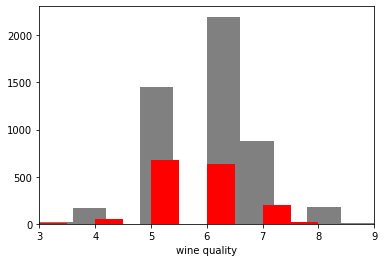

In [8]:
plt.hist(white_wines.quality, color='grey')
plt.hist(red_wines.quality, color='red')
plt.xlabel('wine quality')
plt.xlim(3,9)
plt.show()

In [9]:
# Analyze the correlation between features and the target
corr_white = white_wines.corr()

corr_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


## 2 Regression analysis (basic)
Let's try to model the quality of wine (target)  using the data about it's chemical compounds (features). Build a simple linear regression using the `statsmodels` library. Start only with two components that seem to have most influence. You should have got some ideas which variables might be important from your previous analysis of the data. Produce a regression table and discuss the results. How well does your model explain the target?



In [41]:
# First regression using only two features
mod_white_wine = sm.OLS(white_wines.quality, white_wines.alcohol)
res_white_wine_alc= mod_white_wine.fit()
print(res_white_wine.summary())
#resultset = pd.DataFrame([['alcohol regression', est.rsquared_adj]], 
#                         columns=['name', 'adj r squared]'])
print(resultset.head())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                          2.130e+05
Date:                Thu, 03 Dec 2020   Prob (F-statistic):                        0.00
Time:                        17:03:53   Log-Likelihood:                         -6385.4
No. Observations:                4898   AIC:                                  1.277e+04
Df Residuals:                    4897   BIC:                                  1.278e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## 3 Full regression analysis 
Let's now  try to use all our features. Re-run the regression and check whether its results have improved. Which features seem to play major role? Do you observe any irrelevant features? Did it match the guess we made after looking at correlation? Why could that be? Try out a few more variants of your regression model by discarding less informative features.  

In [26]:
white_features= white_wines.drop('quality', 1)
est = sm.OLS(white_wines.quality, white_features).fit()
resultset = resultset.append({'name': 'full', 'adj r squared]': est.rsquared_adj}, ignore_index=True)
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          2.707e+04
Date:                Thu, 03 Dec 2020   Prob (F-statistic):                        0.00
Time:                        16:44:05   Log-Likelihood:                         -5575.5
No. Observations:                4898   AIC:                                  1.117e+04
Df Residuals:                    4887   BIC:                                  1.124e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity           -0.0506      0.015     -3.356      0.001      -0.080      -0.021
volatile acidity        -1.9585      0.114    -17.196      0.000      -2.182      -1.735
citric acid             -0.0293      0.096     -0.305      0.760      -0.218       0.159
residual sugar           0.0250      0.003      9.642      0.000       0.020       0.030
chlorides               -0.9426      0.543     -1.736      0.083      -2.007       0.122
free sulfur dioxide      0.0048      0.001      5.710      0.000       0.003       0.006
total sulfur dioxide    -0.0009      0.000     -2.352      0.019      -0.002      -0.000
density                  2.0420      0.353      5.780      0.000       1.349       2.735
pH                       0.1684      0.084      2.014      0.044       0.005       0.332
sulphates                0.4165      0.097      4.279      0.000       0.226       0.607
alcohol                  0.3656      0.011     32.880      0.000       0.344       0.387
==============================================================================
Omnibus:                      108.883   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.495
Skew:                           0.064   Prob(JB):                     4.42e-52
Kurtosis:                       4.069   Cond. No.                     7.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Selection based on high p values

In [39]:
white_features= white_wines.drop(['citric acid', 'chlorides','total sulfur dioxide','pH', 'quality'], 1)
est = sm.OLS(white_wines.quality, white_features).fit()
resultset = resultset.append({'name': ' without citricacid, chlorides, pH AND QUALITY', 'adj r squared]': est.rsquared_adj}, ignore_index=True)
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          4.246e+04
Date:                Thu, 03 Dec 2020   Prob (F-statistic):                        0.00
Time:                        16:57:06   Log-Likelihood:                         -5582.0
No. Observations:                4898   AIC:                                  1.118e+04
Df Residuals:                    4891   BIC:                                  1.122e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
fixed acidity          -0.0677      0.013     -5.188      0.000      -0.093      -0.042
volatile acidity       -2.0411      0.109    -18.741      0.000      -2.255      -1.828
residual sugar          0.0237      0.002      9.515      0.000       0.019       0.029
free sulfur dioxide     0.0036      0.001      5.266      0.000       0.002       0.005
density                 2.4378      0.164     14.829      0.000       2.116       2.760
sulphates               0.4086      0.095      4.291      0.000       0.222       0.595
alcohol                 0.3812      0.010     38.552      0.000       0.362       0.401
==============================================================================
Omnibus:                      106.450   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.349
Skew:                           0.078   Prob(JB):                     1.16e-49
Kurtosis:                       4.039   Cond. No.                         648.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
mod_white_wine = sm.OLS(white_wines.quality, white_wines.density)
res_white_wine= mod_white_wine.fit()
print(res_white_wine.summary())
resultset = resultset.append({'name': 'density', 'adj r squared]': est.rsquared_adj}, ignore_index=True)

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                          2.130e+05
Date:                Thu, 03 Dec 2020   Prob (F-statistic):                        0.00
Time:                        16:44:39   Log-Likelihood:                         -6385.4
No. Observations:                4898   AIC:                                  1.277e+04
Df Residuals:                    4897   BIC:                                  1.278e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [29]:
white_features= white_wines[['alcohol', 'density']]
est = sm.OLS(white_wines.quality, white_features).fit()
resultset = resultset.append({'name': 'alcohol, density', 'adj r squared]': est.rsquared_adj}, ignore_index=True)
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                          1.338e+05
Date:                Thu, 03 Dec 2020   Prob (F-statistic):                        0.00
Time:                        16:44:54   Log-Likelihood:                         -5837.8
No. Observations:                4898   AIC:                                  1.168e+04
Df Residuals:                    4896   BIC:                                  1.169e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alcohol        0.3178      0.009     35.028      0.000       0.300       0.336
density        2.5520      0.097     26.415      0.000       2.363       2.741
==============================================================================
Omnibus:                       88.722   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.128
Skew:                           0.030   Prob(JB):                     7.69e-40
Kurtosis:                       3.938   Cond. No.                         90.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4 Comparing regression models
Working on the previous tasks, you have created several regression models for the same data set. You would want to know which model is best for your data. Briefly state which regression statistics you consider to determine the most suitable model. Use this task as an opportunity for verifying that you are familiar with the statistics that the regression output table provides.  

In [40]:
resultset.sort_values(by=['adj r squared]'], inplace=True, ascending=False)
print(resultset)

                                             name  adj r squared]
0               without citricacid, chlorides, pH        1.000000
1                                            full        0.983818
2                                            full        0.983818
3                                            full        0.983818
8               without citricacid, chlorides, pH        0.983788
9   without citricacid, chlorides, pH AND QUALITY        0.983788
4                              alcohol regression        0.982021
5                                alcohol, density        0.982021
6                       citricacid, chlorides, pH        0.977735
7                                         density        0.977735


Briefly state your answers to 3.4 as a bullet list:

- problem with multicollinearity when running the regression with all features
insignifikance proven of citricacid, chlorides, pH

- 2nd best result was achieved with just one x : alcohol
- this one obv. doesn't have multicollinearity

## 5 Residual analysis
Having discussed the suitability of alternative regression models above, you will now be ready to pick your preferred model. Create a residual plot for this model. Briefly discuss the purposes of a residual plot and your findings.

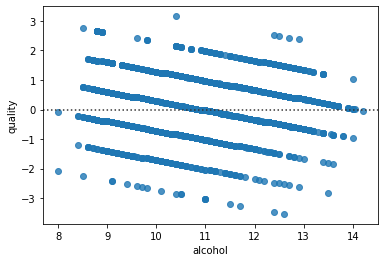

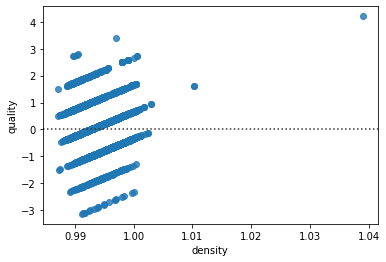

In [49]:
# Residual plot 
import seaborn as sns 
  
# draw residplot 
sns.residplot(x = 'alcohol', 
              y = 'quality', 
              data = white_wines)
              #data = data) 
  
 
# show the plot 
plt.show() 

**Your comments on the residual plot** 

In general, the purpose of a residual plot is:

With regard to the above residual plot, I conclude:

# Well done. You did great in solving all the exercises!